In [2]:
%load_ext autoreload
%autoreload 2
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from preprocess_random_exp.compare_audios import process_audio_file,log_mel_spectrogram, normalize_spectrogram, visualize_log_mel_spectrogram
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

### See few of the Log Mel and Normalized Log Mel Spectograms for generated audios and original audios

In [ ]:
### Incomplete audios

fpaths = ['./data/Clotho/development/Door creaking.wav','./data/Clotho/development/radio static 2.wav', './data/Clotho/development/souffle_me_tallique.wav','./data/Clotho/development/Remix of 114382__jmorrisoncafe330__sax_man_Charlie_Rouse_own_voice_.wav','./data/Clotho/development/Like radio interference #1.wav','./data/Clotho/development/mosquito.wav','./data/Clotho/development/radio static 3.wav','./data/Clotho/development/tram_bell_ride_door.wav','./data/Clotho/development/Car Engine.wav','./data/Clotho/development/Car Keys.wav','./data/Clotho/development/elvis_old_time_radio.wav']

sample_rate=44100
window_length_secs=0.025
hop_length_secs=0.010
num_mels=128
log_offset=0.0
window_length = int(round(sample_rate * window_length_secs))
hop_length = int(round(sample_rate * hop_length_secs))
fft_length = 2 ** int(np.ceil(np.log(window_length) / np.log(2.0)))

for fp in fpaths:
    # log_mel = process_audio_file(fp, log_mel_spectrogram)
    y, sr = librosa.load(fp)
    spect = (librosa.feature.melspectrogram(y=y, sr = sr, n_fft = fft_length, hop_length = hop_length, win_length=window_length, n_mels = num_mels))
    spect = np.maximum(spect,1e-9)
    print(spect)
    log_mel = np.log(spect)
    normal_log_mel = normalize_spectrogram(log_mel)
    visualize_log_mel_spectrogram(normal_log_mel)
    # normal_log_mel = normalize_spectrogram(log_mel,fp)
    # # print(y.shape, normal_log_mel.shape)
    # # break
    # visualize_log_mel_spectrogram(normal_log_mel)
    # visualize_log_mel_spectrogram(y)

[[1.2908991e-01 1.1181570e+00 3.6092016e-01 ... 7.8680378e-01
  4.1178555e+02 9.6922266e+02]
 [8.2517862e-02 1.5564436e-01 9.1906413e-02 ... 1.9054651e+00
  5.6061060e+02 8.0049188e+02]
 [2.2885853e-02 8.9123417e-03 1.2716058e-02 ... 5.4233170e+00
  1.2729133e+02 2.2635994e+02]
 ...
 [6.3457357e-08 9.9999997e-10 9.9999997e-10 ... 1.0840292e-04
  2.0703678e-03 9.5342640e-03]
 [2.0857144e-08 9.9999997e-10 9.9999997e-10 ... 3.5587909e-05
  4.8181566e-04 7.6059764e-03]
 [6.3442904e-09 9.9999997e-10 9.9999997e-10 ... 2.1838694e-07
  6.3235100e-05 6.5907780e-03]]


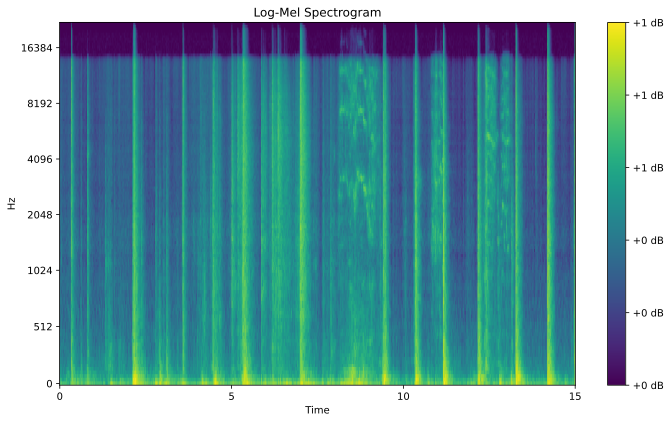

[[4.04208908e+01 4.01511688e+01 3.42349930e+01 ... 1.21975830e+02
  1.90295197e+02 8.82487183e+01]
 [1.40763197e+01 4.73266315e+00 5.02649689e+00 ... 4.81517792e+00
  2.89093094e+01 1.86580601e+01]
 [2.96130013e+00 5.26519299e-01 7.18850791e-01 ... 2.65605718e-01
  7.61017084e-01 1.43884778e+00]
 ...
 [5.74958733e-07 6.00104272e-07 1.85248453e-07 ... 1.88546352e-07
  1.61943490e-06 1.61140124e-04]
 [1.93813875e-07 3.61083998e-08 8.24846680e-09 ... 8.04302402e-09
  1.17245497e-06 1.29580803e-04]
 [3.72362585e-08 9.99999972e-10 9.99999972e-10 ... 9.99999972e-10
  9.91930619e-07 1.11697525e-04]]


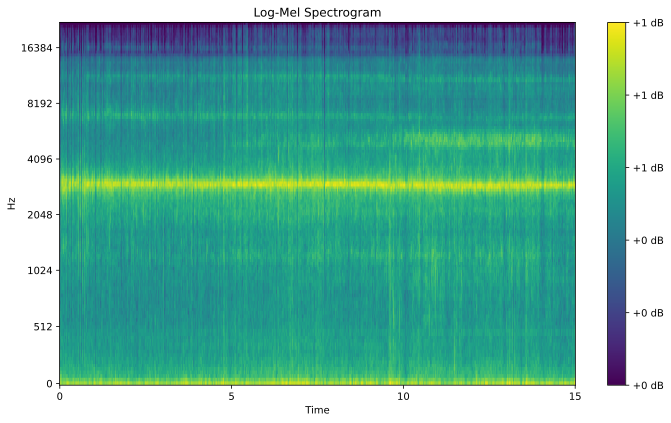

[[9.82014942e+00 5.96803360e+01 9.07719193e+01 ... 6.30118921e-02
  1.02753334e-01 1.50676250e-01]
 [1.10195506e+00 1.93818009e+00 1.17214096e+00 ... 1.53830349e-01
  2.11658776e-01 8.04490447e-02]
 [2.87909389e-01 7.42132843e-01 4.73072588e-01 ... 2.06602767e-01
  4.20666754e-01 8.19576085e-02]
 ...
 [2.80338668e-06 2.90956788e-08 9.99999972e-10 ... 1.24585466e-03
  6.05785754e-03 3.68142175e-03]
 [9.22827041e-07 9.04172470e-09 9.99999972e-10 ... 1.86268313e-04
  2.58083805e-04 3.41134408e-04]
 [1.68086814e-07 1.54372115e-09 9.99999972e-10 ... 1.49684070e-06
  5.83389692e-06 7.37550909e-06]]


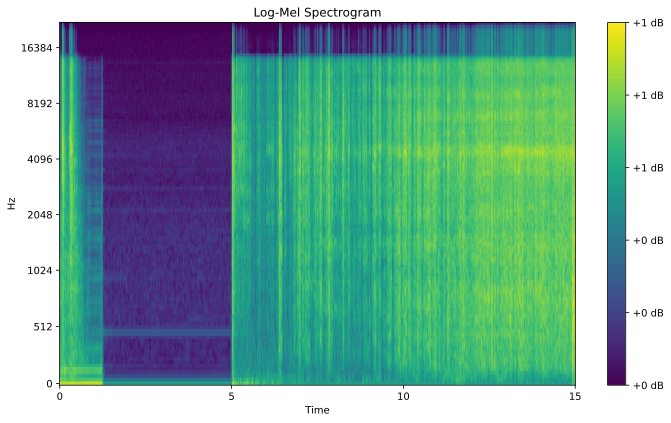

[[1.6859915e+00 1.5392722e-01 2.9350543e-01 ... 2.8914185e+02
  1.1545382e+02 1.2735347e+01]
 [3.4600706e+00 3.0901286e-01 8.9066988e-01 ... 9.5475597e+00
  1.8761528e+01 2.4121885e+00]
 [3.4854770e+00 1.0295591e+00 3.1612267e+00 ... 7.2666395e-01
  1.1343952e+00 1.0254244e+00]
 ...
 [3.8179581e-04 3.8112912e-06 9.9999997e-10 ... 9.3405061e-09
  3.5914614e-05 3.8079873e-03]
 [1.2179000e-04 1.1134244e-06 9.9999997e-10 ... 9.9999997e-10
  2.7813045e-05 3.0709268e-03]
 [2.4700585e-05 1.8228647e-07 9.9999997e-10 ... 9.9999997e-10
  2.3521823e-05 2.6460192e-03]]


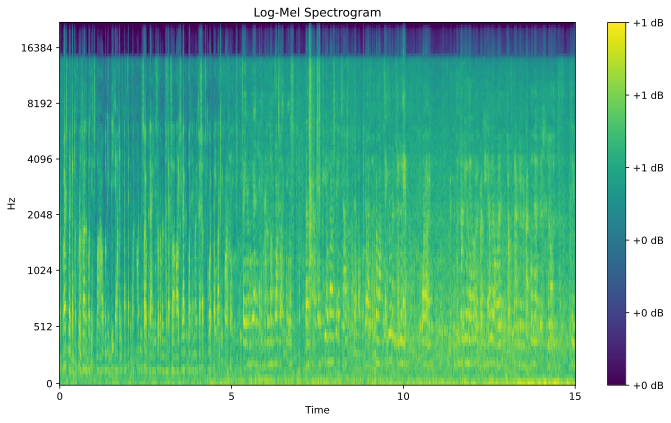

[[9.53655338e+00 3.25792618e+01 2.66506815e+00 ... 1.15082645e+01
  1.63804889e+00 9.95522618e-01]
 [3.23571253e+00 5.40685606e+00 1.73285878e+00 ... 7.80693412e-01
  1.33673579e-01 3.29502285e-01]
 [5.33076942e-01 9.15938795e-01 3.13221216e-01 ... 7.21182525e-02
  2.15339243e-01 7.22029656e-02]
 ...
 [3.09951503e-07 3.33542416e-09 9.99999972e-10 ... 9.99999972e-10
  1.52615243e-07 1.62222495e-05]
 [1.00725856e-07 9.99999972e-10 9.99999972e-10 ... 9.99999972e-10
  1.17938228e-07 1.30603339e-05]
 [2.84466886e-08 9.99999972e-10 9.99999972e-10 ... 9.99999972e-10
  9.99515279e-08 1.12677608e-05]]


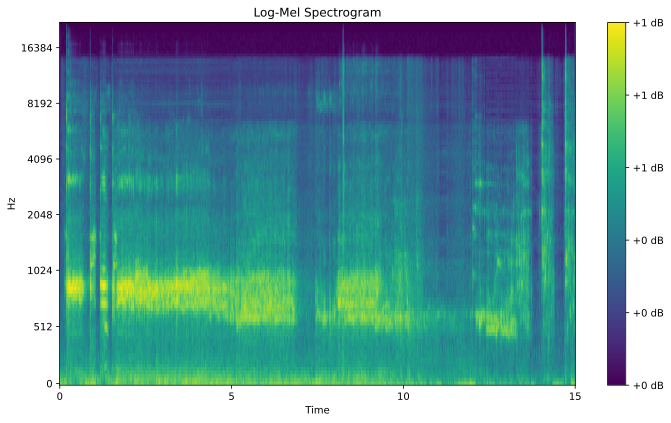

[[6.2819269e+02 1.3250266e+03 5.9038965e+02 ... 6.0071826e+02
  1.9813728e+03 1.6855859e+02]
 [1.1727294e+02 4.3072063e+01 3.1849577e+01 ... 1.0984551e+02
  1.7982776e+02 5.7087761e+01]
 [2.9245539e+01 5.0021443e+00 2.4163651e+00 ... 6.2147179e+01
  4.5651388e+00 3.9901011e+00]
 ...
 [3.6972878e-04 3.6369158e-06 9.9999997e-10 ... 7.6650856e-08
  1.7416704e-06 1.6319119e-04]
 [1.1941428e-04 1.0572978e-06 9.9999997e-10 ... 6.0766894e-09
  1.2290363e-06 1.3262601e-04]
 [2.8709534e-05 1.9883163e-07 9.9999997e-10 ... 9.9999997e-10
  1.0171727e-06 1.1363342e-04]]


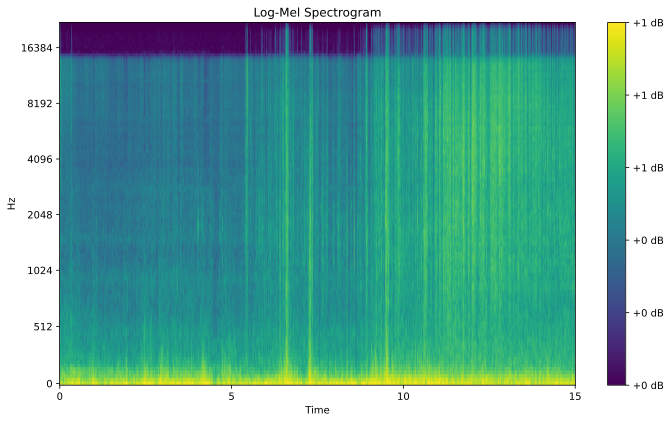

[[8.63183784e+00 1.62499619e+01 1.68697418e+02 ... 1.04207251e+03
  2.43247253e+02 1.47049561e+02]
 [2.13146663e+00 3.11081499e-01 6.47387791e+00 ... 1.09007886e+03
  2.79974594e+01 5.68573341e+01]
 [8.21644068e-01 9.84607711e-02 3.23941976e-01 ... 2.87146393e+02
  1.48642006e+01 5.29345360e+01]
 ...
 [3.14129793e-05 3.11422383e-07 9.99999972e-10 ... 9.99999972e-10
  1.29459459e-05 1.37051928e-03]
 [1.00525995e-05 9.06275091e-08 9.99999972e-10 ... 9.99999972e-10
  1.00128191e-05 1.10444380e-03]
 [2.18968285e-06 1.56133826e-08 9.99999972e-10 ... 9.99999972e-10
  8.45434442e-06 9.50479880e-04]]


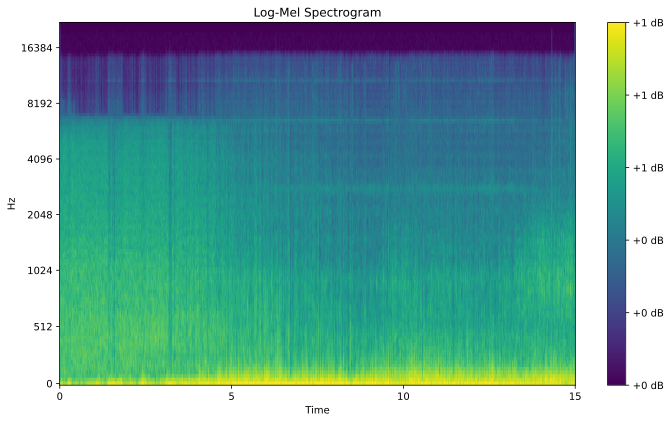

[[1.59214554e+02 1.84146637e+02 1.34042374e+02 ... 4.02503815e+01
  7.27882919e+01 7.30480433e+00]
 [5.06717796e+01 1.76459518e+02 5.02323341e+01 ... 1.25049305e+01
  2.67729073e+01 1.70564091e+00]
 [5.87948942e+00 2.74213562e+01 1.19448566e+01 ... 9.59429622e-01
  3.27456093e+00 2.10294724e+00]
 ...
 [1.29398541e-06 1.34109053e-08 9.99999972e-10 ... 8.32852010e-09
  1.53472411e-06 1.62194643e-04]
 [4.19389693e-07 4.04552081e-09 9.99999972e-10 ... 9.99999972e-10
  1.17905643e-06 1.30304805e-04]
 [7.56323928e-08 9.99999972e-10 9.99999972e-10 ... 9.99999972e-10
  9.96675908e-07 1.12229798e-04]]


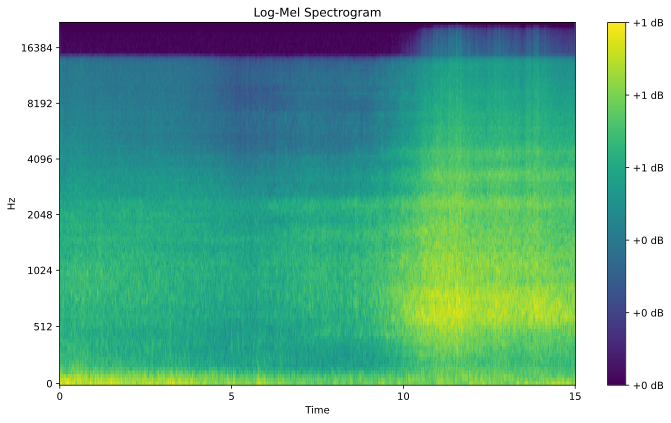

[[1.43451063e-04 1.47953338e-04 1.02271035e-04 ... 7.62563373e-04
  4.51203994e-03 2.27595977e-02]
 [2.45792791e-04 1.61798926e-05 6.30229215e-06 ... 2.60557421e-03
  9.90113150e-03 4.56937030e-02]
 [2.56567524e-04 1.68964252e-04 6.70550980e-06 ... 6.74439490e-01
  4.71838027e-01 2.47642398e-01]
 ...
 [1.33101823e-08 9.99999972e-10 9.99999972e-10 ... 9.99999972e-10
  1.39408044e-07 1.47312521e-05]
 [4.35198455e-09 9.99999972e-10 9.99999972e-10 ... 9.99999972e-10
  1.07839767e-07 1.18842490e-05]
 [1.47257151e-09 9.99999972e-10 9.99999972e-10 ... 9.99999972e-10
  9.09641145e-08 1.02240556e-05]]


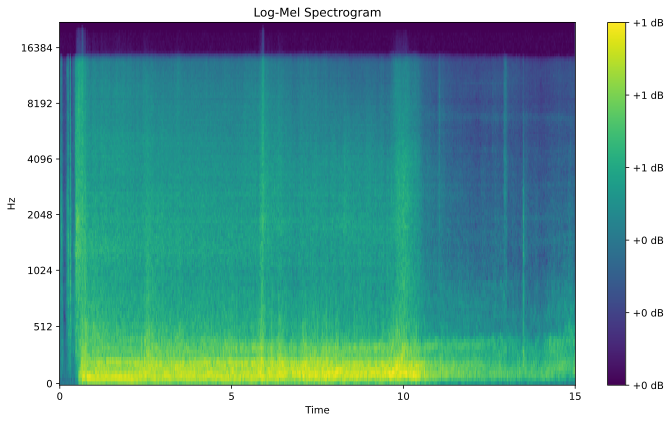

[[1.0812464e+02 2.0405302e+02 1.0974682e+02 ... 5.3165918e+02
  3.2836261e+02 5.5423267e+01]
 [4.6718487e+01 4.1452610e+01 7.1707706e+00 ... 6.6472939e+01
  9.2386414e+01 2.0338285e+01]
 [9.1622105e+00 7.3548371e-01 7.6462311e-01 ... 9.0030212e+00
  4.7178574e+00 3.3458452e+00]
 ...
 [2.9569870e-05 2.9029036e-07 9.9999997e-10 ... 1.4207896e-07
  6.2729987e-07 8.2317692e-06]
 [9.5916421e-06 8.4354653e-08 9.9999997e-10 ... 2.6333810e-08
  8.2333869e-08 5.8069550e-06]
 [2.3976947e-06 1.6488933e-08 9.9999997e-10 ... 9.9999997e-10
  4.3987008e-08 5.0875301e-06]]


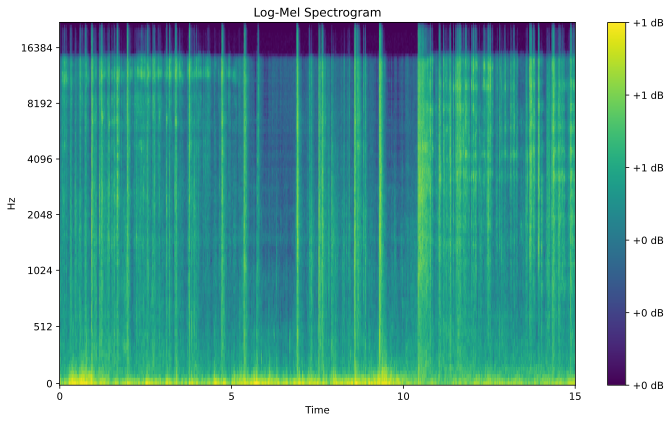

[[2.08008850e+02 8.69291321e+02 2.76322113e+02 ... 3.16207957e+00
  2.20579338e+00 3.23594838e-01]
 [1.04352684e+02 1.13229309e+02 1.83374817e+02 ... 3.67061162e+00
  3.33946228e+00 7.21265554e-01]
 [1.15471054e+02 5.36431580e+01 3.89631500e+01 ... 2.00686884e+00
  7.88375854e-01 4.67589647e-01]
 ...
 [1.98393027e-05 1.96794261e-07 2.42154430e-09 ... 1.69348162e-08
  4.23953315e-06 4.49082057e-04]
 [6.55773374e-06 5.66367291e-08 9.99999972e-10 ... 9.99999972e-10
  3.27653242e-06 3.61789716e-04]
 [1.87494652e-06 1.27334676e-08 9.99999972e-10 ... 9.99999972e-10
  2.76969513e-06 3.11705429e-04]]


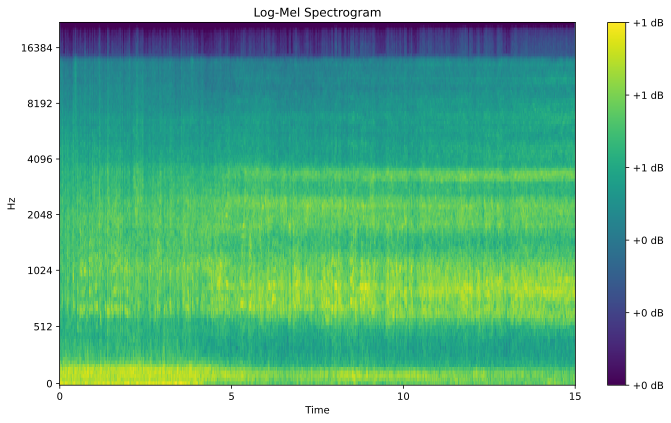

In [3]:
cap_num = 1
fpaths = [f'./data/Clotho_caption_{cap_num}/development/Door creaking_cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/radio static 2_cap_{cap_num}.wav', f'./data/Clotho_caption_{cap_num}/development/souffle_me_tallique_cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/Remix of 114382__jmorrisoncafe330__sax_man_Charlie_Rouse_own_voice__cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/Like radio interference #1_cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/mosquito_cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/radio static 3_cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/tram_bell_ride_door_cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/Car Engine_cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/Car Keys_cap_{cap_num}.wav',f'./data/Clotho_caption_{cap_num}/development/elvis_old_time_radio_cap_{cap_num}.wav']

sample_rate=44100
window_length_secs=0.025
hop_length_secs=0.010
num_mels=128
log_offset=0.0
window_length = int(round(sample_rate * window_length_secs))
hop_length = int(round(sample_rate * hop_length_secs))
fft_length = 2 ** int(np.ceil(np.log(window_length) / np.log(2.0)))

for fp in fpaths:
    # log_mel = process_audio_file(fp, log_mel_spectrogram)
    y, sr = librosa.load(fp)
    spect = (librosa.feature.melspectrogram(y=y, sr = sr, n_fft = fft_length, hop_length = hop_length, win_length=window_length, n_mels = num_mels))
    spect = np.maximum(spect,1e-9)
    print(spect)
    log_mel = np.log(spect)
    normal_log_mel = normalize_spectrogram(log_mel)
    visualize_log_mel_spectrogram(normal_log_mel)
    # normal_log_mel = normalize_spectrogram(log_mel,fp)
    # # print(y.shape, normal_log_mel.shape)
    # # break
    # visualize_log_mel_spectrogram(normal_log_mel)
    # visualize_log_mel_spectrogram(y)

### Similarity Scores between original and generated audios for Cap Col 1

#### DTW

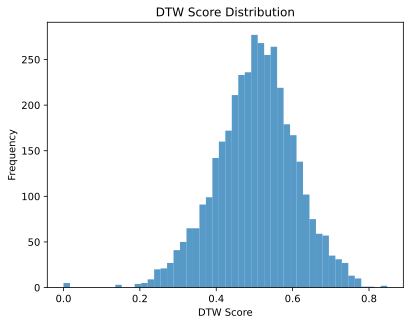

Number of audios that are very similar (dtw score < 0.6): 3199


In [4]:
method = 'dtw'
cap_num = 1
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('DTW Score Distribution')
plt.xlabel('DTW Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')


### WCC

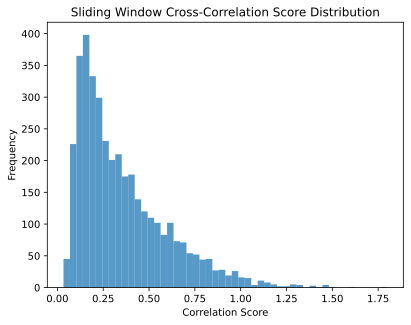

Number of audios that are very similar (cross-correlation score < 0.6): 3218
Number of audios with negative correlation (cross-correlation score > 1): 75


In [5]:
method = 'wcc'
cap_num = 1
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Sliding Window Cross-Correlation Score Distribution')
plt.xlabel('Correlation Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)
negative_correlation_count = (df['similarity_score'] > 1).sum()

# Print the count of very similar audios
print(f'Number of audios that are very similar (cross-correlation score < {similarity_threshold}): {very_similar_count}')

# Print the count of audios with negative correlation (score > 1)
print(f'Number of audios with negative correlation (cross-correlation score > 1): {negative_correlation_count}')


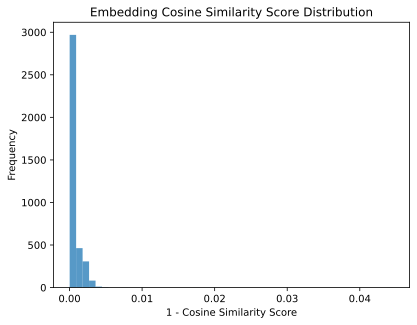

Number of audios that are very similar (dtw score < 0.006): 3836


In [6]:
method = 'model'
cap_num = 1
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Embedding Cosine Similarity Score Distribution')
plt.xlabel('1 - Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.006  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')

### Similarity Scores between original and generated audios for Cap Col 2

#### DTW

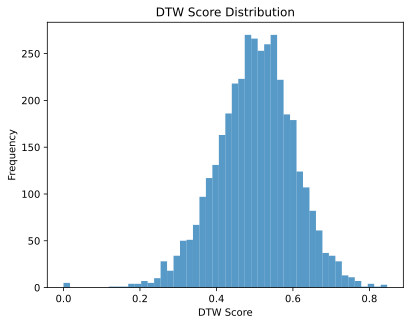

Number of audios that are very similar (dtw score < 0.6): 3233


In [7]:
method = 'dtw'
cap_num = 2
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('DTW Score Distribution')
plt.xlabel('DTW Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')


### WCC

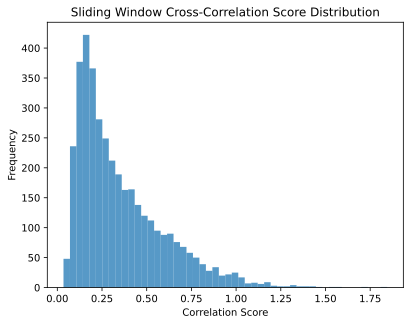

Number of audios that are very similar (cross-correlation score < 0.6): 3228
Number of audios with negative correlation (cross-correlation score > 1): 77


In [8]:
method = 'wcc'
cap_num = 2
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Sliding Window Cross-Correlation Score Distribution')
plt.xlabel('Correlation Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)
negative_correlation_count = (df['similarity_score'] > 1).sum()

# Print the count of very similar audios
print(f'Number of audios that are very similar (cross-correlation score < {similarity_threshold}): {very_similar_count}')

# Print the count of audios with negative correlation (score > 1)
print(f'Number of audios with negative correlation (cross-correlation score > 1): {negative_correlation_count}')


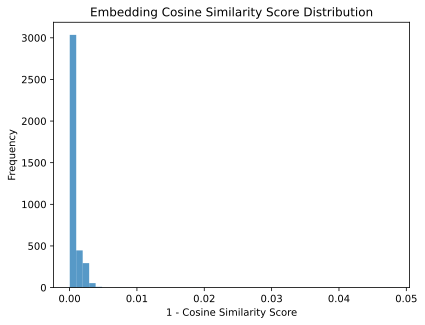

Number of audios that are very similar (dtw score < 0.006): 3836


In [10]:
method = 'model'
cap_num = 2
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Embedding Cosine Similarity Score Distribution')
plt.xlabel('1 - Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.006  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')

### Similarity Scores between original and generated audios for Cap Col 3

#### DTW

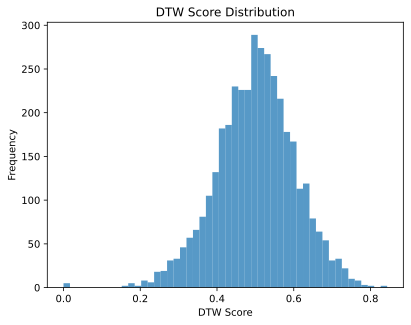

Number of audios that are very similar (dtw score < 0.6): 3225


In [11]:
method = 'dtw'
cap_num = 3
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('DTW Score Distribution')
plt.xlabel('DTW Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')


### WCC

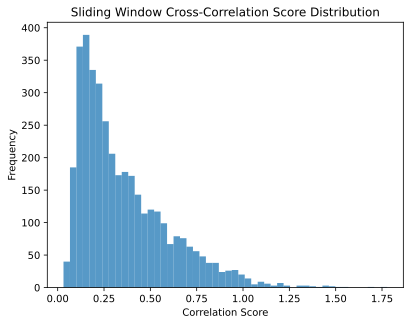

Number of audios that are very similar (cross-correlation score < 0.6): 3237
Number of audios with negative correlation (cross-correlation score > 1): 68


In [12]:
method = 'wcc'
cap_num = 3
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Sliding Window Cross-Correlation Score Distribution')
plt.xlabel('Correlation Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)
negative_correlation_count = (df['similarity_score'] > 1).sum()

# Print the count of very similar audios
print(f'Number of audios that are very similar (cross-correlation score < {similarity_threshold}): {very_similar_count}')

# Print the count of audios with negative correlation (score > 1)
print(f'Number of audios with negative correlation (cross-correlation score > 1): {negative_correlation_count}')


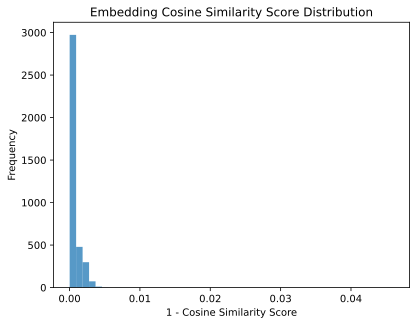

Number of audios that are very similar (dtw score < 0.006): 3836


In [17]:
method = 'model'
cap_num = 3
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Embedding Cosine Similarity Score Distribution')
plt.xlabel('1 - Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.006  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')

### Similarity Scores between original and generated audios for Cap Col 4

#### DTW

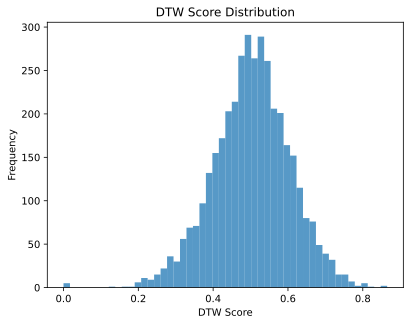

Number of audios that are very similar (dtw score < 0.6): 3196


In [18]:
method = 'dtw'
cap_num = 4
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('DTW Score Distribution')
plt.xlabel('DTW Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')


### WCC

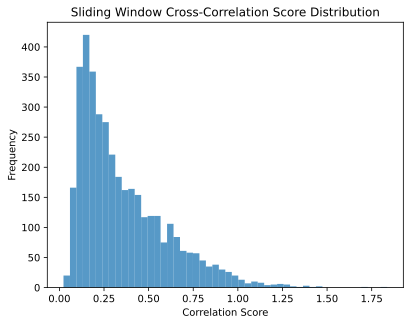

Number of audios that are very similar (cross-correlation score < 0.6): 3207
Number of audios with negative correlation (cross-correlation score > 1): 70


In [19]:
method = 'wcc'
cap_num = 4
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Sliding Window Cross-Correlation Score Distribution')
plt.xlabel('Correlation Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)
negative_correlation_count = (df['similarity_score'] > 1).sum()

# Print the count of very similar audios
print(f'Number of audios that are very similar (cross-correlation score < {similarity_threshold}): {very_similar_count}')

# Print the count of audios with negative correlation (score > 1)
print(f'Number of audios with negative correlation (cross-correlation score > 1): {negative_correlation_count}')


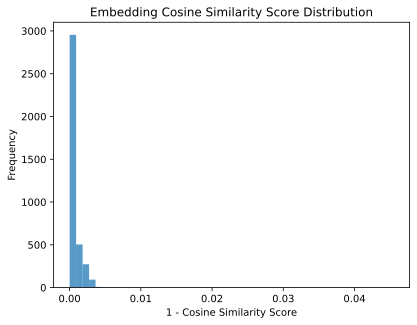

Number of audios that are very similar (dtw score < 0.006): 3837


In [20]:
method = 'model'
cap_num = 4
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Embedding Cosine Similarity Score Distribution')
plt.xlabel('1 - Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.006  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')

### Similarity Scores between original and generated audios for Cap Col 5

#### DTW

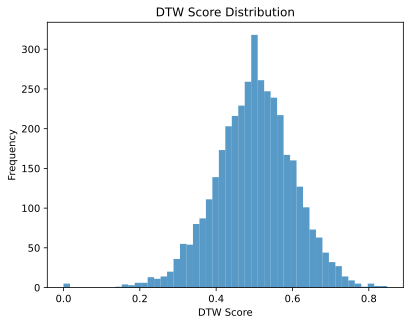

Number of audios that are very similar (dtw score < 0.6): 3232


In [21]:
method = 'dtw'
cap_num = 5
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('DTW Score Distribution')
plt.xlabel('DTW Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')


### WCC

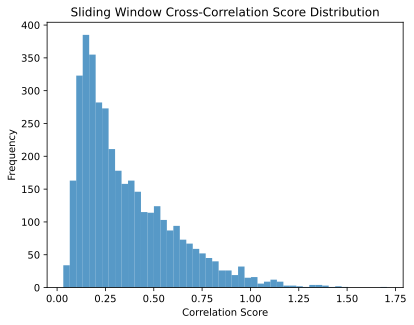

Number of audios that are very similar (cross-correlation score < 0.6): 3211
Number of audios with negative correlation (cross-correlation score > 1): 78


In [22]:
method = 'wcc'
cap_num = 5
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Sliding Window Cross-Correlation Score Distribution')
plt.xlabel('Correlation Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.6  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)
negative_correlation_count = (df['similarity_score'] > 1).sum()

# Print the count of very similar audios
print(f'Number of audios that are very similar (cross-correlation score < {similarity_threshold}): {very_similar_count}')

# Print the count of audios with negative correlation (score > 1)
print(f'Number of audios with negative correlation (cross-correlation score > 1): {negative_correlation_count}')


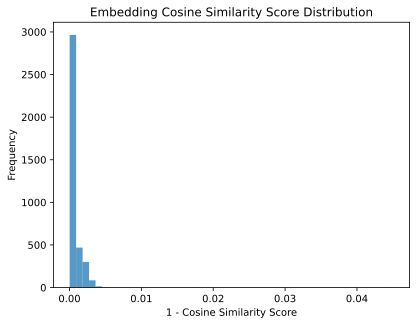

Number of audios that are very similar (dtw score < 0.006): 3837


In [24]:
method = 'model'
cap_num = 5
output_csv_path = f'./temp/original_vs_cap_{cap_num}_generated_audio_via_{method}.csv'

# Load the CSV file containing the similarity scores
df = pd.read_csv(output_csv_path)

# Plot the distribution of cross-correlation scores
plt.hist(df['similarity_score'], bins=50, alpha=0.75)
plt.title('Embedding Cosine Similarity Score Distribution')
plt.xlabel('1 - Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for "very similar" (you can adjust this value)
similarity_threshold = 0.006  # Adjust as necessary (lower values indicate higher similarity)

# Count the number of audios that are very similar
very_similar_count = (df['similarity_score'] < similarity_threshold).sum()

# Count the number of audios with scores beyond 1 (potentially negative correlation)

# Print the count of very similar audios
print(f'Number of audios that are very similar (dtw score < {similarity_threshold}): {very_similar_count}')